## DS05 - Data Science with Python - Linear Model Regression (Solutions)


In [16]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

### Debugging Problem
The dataset used in the problem below consists of two columns: one for years of experience and another for salaries. An attempt was made to apply a linear regression model to the data. Debug the code to fix the model. Note, since this is a small data set I've chosen test size to be $0.5$ so that there are enough test points to plot a best fit line encompassing most of the data. This may reduce the score of the model but the line plots shouldn't change too drastically as a result. The score should be consistently above $0.9$ when running the code multiple times.

In [17]:
## SETUP CODE CELL DO NOT CHANGE
# Convert csv to data frame
salary_data = pd.read_csv("Salary_Data.csv")
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [18]:
## PROBLEM CODE CELL
# Independent variable
X = salary_data["YearsExperience"].values
X = X.reshape(-1,1)

# Dependant variable or labels
y = salary_data["Salary"].values # Reshaped X and y
y = y.reshape(-1,1)

# Preprocessing into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


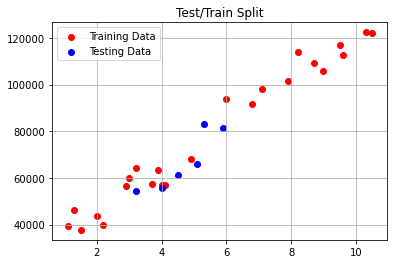

In [19]:
# Plotting the training and testing splits
plt.scatter(X_train, y_train, label = "Training Data", color = 'r')
plt.scatter(X_test, y_test, label = "Testing Data", color = 'b')
plt.legend()
plt.grid("True")
plt.title("Test/Train Split")
plt.show()

0.6616374659787981

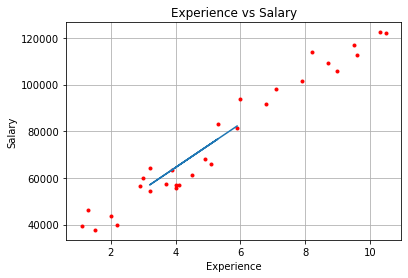

In [20]:

# Defining our regressor
regressor = LinearRegression()

# Training the regressor
fit = regressor.fit(X_train, y_train)

 # Obtaining predicted results from the test data
y_pred = fit.predict(X_test)

# # Plotting the line of best fit
plt.figure()
plt.grid(True)
plt.plot(X,y,"r.")
plt.plot(X_test,y_pred)
plt.title("Experience vs Salary")
plt.xlabel("Experience")
plt.ylabel("Salary")

# # Scores the model
fit.score(X_test,y_test)#

0.9284358173678489

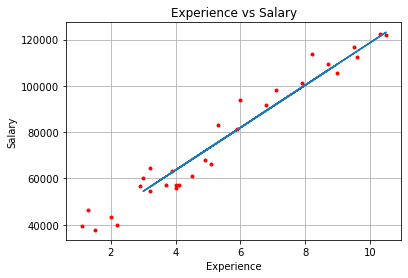

In [21]:
## SOLUTION CODE CELL
# Independent variable
X = salary_data["YearsExperience"].values.reshape(-1,1)

# Dependent variable
y = salary_data["Salary"].values.reshape(-1,1)

# Preprocessing into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

# Defining our regressor
regressor = LinearRegression()

# Training the regressor
fit = regressor.fit(X_train, y_train)

# Obtaining predicted results from the test data
y_pred = fit.predict(X_test)

# Plotting the line of best fit
plt.figure()
plt.grid(True)
plt.plot(X,y,"r.")
plt.plot(X_test,y_pred)
plt.title("Experience vs Salary")
plt.xlabel("Experience")
plt.ylabel("Salary")

# Scores the model
fit.score(X_test,y_test)

### Building your own model
The data set "fish-market.zip" contains data on the lengths, height and width of fish for various fish species. The function ````pd.read_csv```` can open csv files within zip files so just use the zip file name as the argument for this function. From this csv file create one data frame for each fish species where data for the other species has been removed. Then define a function which splits takes a data frame as the argument. The function should create a linear regression model for the input fish species data frame. For your independent variables use all of the columns other than "Species" and "Weight". Within the function print the score for the model then return the trained model as output for the function. Run the function once for each of your fish species data frames. Hint: What Pandas functions will help you identify and select specific species? Feel free to refer back to the last workshop if need be!

Note: given how small this data set is, expect the score to potentially vary wildly. This happens because often the ````train_test_split```` function might allocate the test data in a region outside the training data. Compare your result to the solutions when you are confident with your function.

In [22]:
## SOLUTION CODE CELL
# Converts data set to data frame
df = pd.read_csv("Fish.csv")

# Determines unique entries to the Species column
df["Species"].unique()

# Creates new data frames for each species
Bream = df.loc[df["Species"] == "Bream"]
Roach = df.loc[df["Species"] == "Roach"]
Whitefish = df.loc[df["Species"] == "Whitefish"]
Parkki = df.loc[df["Species"] == "Parkki"]
Perch = df.loc[df["Species"] == "Perch"]
Pike = df.loc[df["Species"] == "Pike"]
Smelt = df.loc[df["Species"] == "Smelt"]

# Defines function that will generate a model for a given fish species
def Fish_Weight(df):
    '''Takes a data frame for one of the chosen fish species and
    creates a linear regression model for that species which is 
    returned as the function output in the form of a trained regressor.'''
    
    # Independent variables (mayhaps not entirely independent)
    X = df.drop(["Species","Weight"],axis=1)
    # Dependent variable
    y = df["Weight"].values.reshape(-1,1)
    
    # Splitting into test and training sets
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    
    # Choosing our regressor
    regressor = LinearRegression(n_jobs=-1)
    
    # Training
    fit = regressor.fit(X_train,y_train)
    
    # Scoring
    score = fit.score(X_test,y_test)
    print("Regressor score:", score)
    
    # Returns trained classifier
    return fit

# Running the function
Fish_Weight(Bream)
Fish_Weight(Roach)
Fish_Weight(Whitefish)
Fish_Weight(Parkki)
Fish_Weight(Perch)
Fish_Weight(Pike)
Fish_Weight(Smelt)

Regressor score: 0.9829517645677904
Regressor score: 0.8733074208276486
Regressor score: 0.9818186982823301
Regressor score: 0.9135976701175581
Regressor score: 0.9381553956657899
Regressor score: 0.9502178341186498
Regressor score: 0.9069163738204976


LinearRegression(n_jobs=-1)

Besides the lack of data what might be a problem with our choice of independant variables? If you're stuck on this try using ````df.corr()````. This returns a data frame showing the correlation between all the columns.

In [23]:
# Table of correlation between variables
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


Above we can see that our choice of independant might not be as independant as we thought. The data frame shows a strong positive correlation between many of the variables we chose to be independant. This is a problem because when we change one of these variables the others are likely to change so we'll have very little notion as to which of these changes is what caused the change in weight which is what we are trying to determine.

### References:
"Salary_Data.csv": https://www.kaggle.com/uditkhanna112/linear-regressionsalary-vs-experience

"fish-market.zip": https://www.kaggle.com/aungpyaeap/fish-market